In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")


Num GPUs Available:  1
Default GPU Device:/device:GPU:0


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution
from scipy.stats import cauchy, logistic

Text(0.5, 1.0, 'ALB')

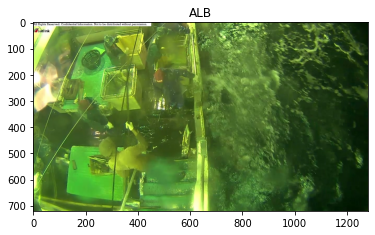

In [2]:
alb = imread('D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB\\img_00043.jpg')
plt.imshow(alb)
plt.title('ALB')

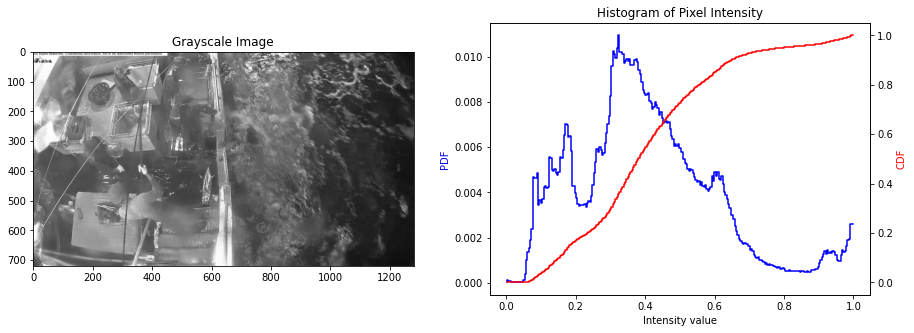

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
cathedral_gray = rgb2gray(alb)
ax[0].imshow(cathedral_gray, cmap='gray')
ax[0].set_title('Grayscale Image')
ax1 = ax[1]
ax2 = ax1.twinx()
freq_h, bins_h = histogram(cathedral_gray)
freq_c, bins_c = cumulative_distribution(cathedral_gray)
ax1.step(bins_h, freq_h*1.0/freq_h.sum(), c='b', label='PDF')
ax2.step(bins_c, freq_c, c='r',  label='CDF')
ax1.set_ylabel('PDF', color='b')
ax2.set_ylabel('CDF', color='r')
ax[1].set_xlabel('Intensity value')
ax[1].set_title('Histogram of Pixel Intensity');

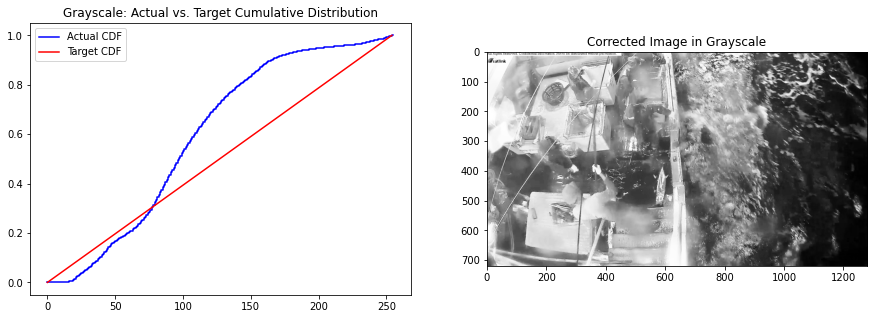

In [4]:
image_intensity = img_as_ubyte(cathedral_gray)
freq, bins = cumulative_distribution(image_intensity)
target_bins = np.arange(255)
target_freq = np.linspace(0, 1, len(target_bins))
new_vals = np.interp(freq, target_freq, target_bins)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].step(bins, freq, c='b', label='Actual CDF')
ax[0].plot(target_bins, target_freq, c='r', label='Target CDF')
ax[0].legend()
ax[0].set_title('Grayscale: Actual vs. '
                'Target Cumulative Distribution')
ax[1].imshow(new_vals[image_intensity].astype(np.uint8), 
             cmap='gray')
ax[1].set_title('Corrected Image in Grayscale');

In [9]:
def show_linear_cdf(image, channel, name, ax):
    image_intensity = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(image_intensity)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    ax.step(bins, freq, c='b', label='Actual CDF')
    ax.plot(target_bins, target_freq, c='r', label='Target CDF')
    ax.legend()
    ax.set_title('{} Channel: Actual vs. '
                 'Target Cumulative Distribution'.format(name))
                 
def linear_distribution(image, channel):
    image_intensity = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(image_intensity)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    new_vals = np.interp(freq, target_freq, target_bins)
    return new_vals[image_intensity].astype(np.uint8)

Text(0.5, 1.0, 'Corrected Image in Blue Channel')

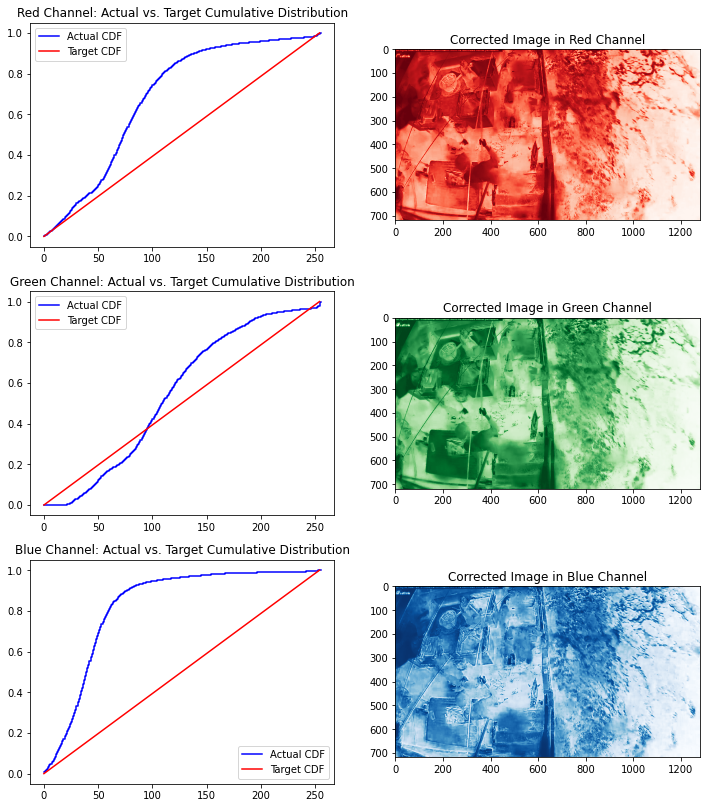

In [17]:
fig, ax = plt.subplots(3,2, figsize=(12,14))
red_channel = linear_distribution(alb, 0)
green_channel = linear_distribution(alb, 1)
blue_channel = linear_distribution(alb, 2)
show_linear_cdf(alb, 0, 'Red', ax[0,0])
ax[0,1].imshow(red_channel, cmap='Reds')
ax[0,1].set_title('Corrected Image in Red Channel')
show_linear_cdf(alb, 1, 'Green', ax[1,0])
ax[1,1].imshow(green_channel, cmap='Greens')
ax[1,1].set_title('Corrected Image in Green Channel')
show_linear_cdf(alb, 2, 'Blue', ax[2,0])
ax[2,1].imshow(blue_channel, cmap='Blues')
ax[2,1].set_title('Corrected Image in Blue Channel')

In [61]:
def individual_channel(image, dist, channel):
    im_channel = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(im_channel)
    new_vals = np.interp(freq, dist.cdf(np.arange(0,256)), 
                               np.arange(0,256))
    return new_vals[im_channel].astype(np.uint8)
def distribution(image, function, mean, std):
    dist = function(mean, std)
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    image_intensity = img_as_ubyte(rgb2gray(image))
    freq, bins = cumulative_distribution(image_intensity)
    ax[0].step(bins, freq, c='b', label='Actual CDF')
    ax[0].plot(dist.cdf(np.arange(0,255)), 
               c='r', label='Target CDF')
    ax[0].legend()
    ax[0].set_title('Actual vs. Target Cumulative Distribution')
    
    red = individual_channel(image, dist, 0)
    green = individual_channel(image, dist, 1)
    blue = individual_channel(image, dist, 2)    
    ax[1].imshow(np.dstack((red, green, blue)))
    ax[1].set_title('Transformed Image')
    return ax
def distribution2(image, function, mean, std):
    dist = function(mean, std)
    red = individual_channel(image, dist, 0)
    green = individual_channel(image, dist, 1)
    blue = individual_channel(image, dist, 2)    
    return np.dstack((red, green, blue))

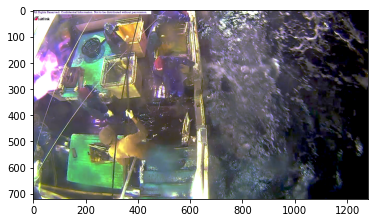

In [60]:
#distribution(alb, cauchy, 90, 30)
plt.imshow(distribution2(alb, cauchy, 90, 30))

korekcja i zapis zdjęć

In [82]:
# import required module
import os
from PIL import Image  
import colorcorrect.algorithm as cca
from colorcorrect.util import from_pil, to_pil

# assign directory
directory = 'D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB'

# iterate over files in
# that directory
def list_files(directory):
	i=0
	for filename in os.listdir(directory):
		f = os.path.join(directory, filename)
		# checking if it is a file
		if os.path.isfile(f):
			#plt.savefig('D:\\the-nature-conservancy-fisheries-monitoring2\\train\\ALB\\img.jpg',image_adjustment(imread(f)))
			#im = Image.fromarray(image_adjustment(imread(f)))
			#im.save('D:\\the-nature-conservancy-fisheries-monitoring2\\train\\ALB\\img_'+ i.__str__()+'.jpg' )
			img = Image.open(f)
			to_pil(cca.automatic_color_equalization(from_pil(img))).save('D:\\the-nature-conservancy-fisheries-monitoring2\\train\\ALB\\img_'+ i.__str__()+'.jpg')
			i+=1

list_files(directory)

KeyboardInterrupt: 

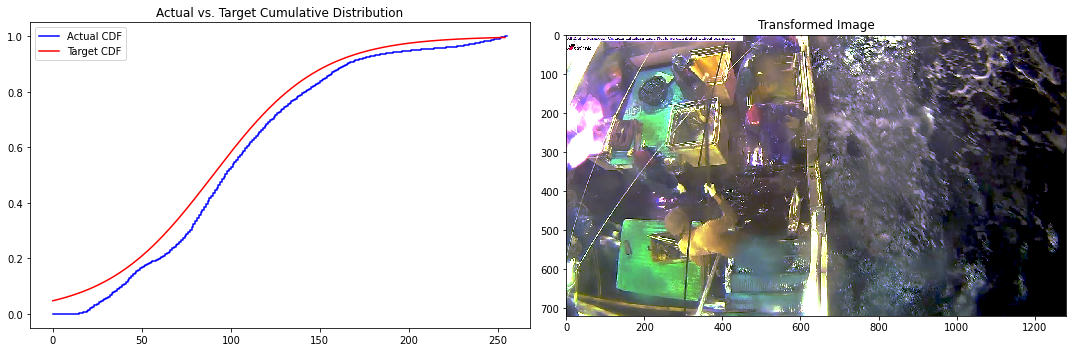

In [59]:
distribution(alb, logistic, 90, 30);
imshow(distribution2(alb, logistic, 90, 30))

In [21]:
#Import the required Python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imshow, imread

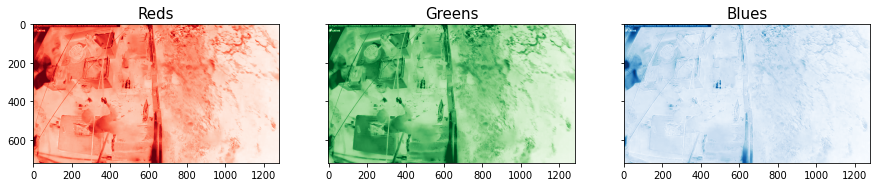

In [23]:
image_overcast = imread('D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB\\img_00043.jpg')
rgb_list = ['Reds','Greens','Blues']
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   ax[i].imshow(image_overcast[:,:,i], cmap = rgb_list[i])
   ax[i].set_title(rgb_list[i], fontsize = 15)

In [39]:
def channel_statistics(image):
    df_color = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        perc_90 = np.percentile(image[:,:,i], 90, axis=(0,1))
        perc_95 = np.percentile(image[:,:,i], 95, axis=(0,1))
        perc_99 = np.percentile(image[:,:,i], 99, axis=(0,1))
        
        row = (max_color, mean_color, median_color, 
               perc_90, perc_95, perc_99)        
        df_color.append(row)
        
    return pd.DataFrame(df_color, 
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Max', 'Mean', 'Median', 
                                   'P_90',' P_95', 'P_99'])
channel_statistics(image_overcast)

,Max,Mean,Median,P_90,P_95,P_99
Red,-1,81.461683,75.0,140.0,184.0,254.0
Green,-1,116.504275,110.0,191.0,221.0,255.0
Blue,-1,46.199603,41.0,78.0,106.0,209.0


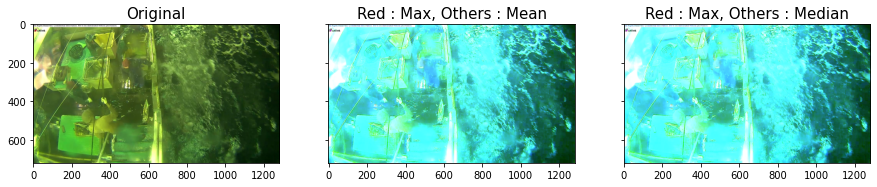

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True)
f_size = 15
ax[0].imshow(image_overcast)
ax[0].set_title('Original', fontsize = f_size)
ax[1].imshow(img_as_ubyte((image_overcast / 
                           [np.max(image_overcast[:,:,0]),
                            np.mean(image_overcast[:,:,1]),
                            np.mean(image_overcast[:,:,2])])
                            #np.mean(image_overcast[:,:,3])])
                            .clip(0, 1)))
ax[1].set_title('Red : Max, Others : Mean', fontsize = f_size)
ax[2].imshow(img_as_ubyte((image_overcast / 
                           [np.max(image_overcast[:,:,0]),
                            np.median(image_overcast[:,:,1]),
                            np.median(image_overcast[:,:,2])])                                    
                            #np.median(image_overcast[:,:,3])])
                            .clip(0, 1)))
ax[2].set_title('Red : Max, Others : Median', fontsize = f_size);

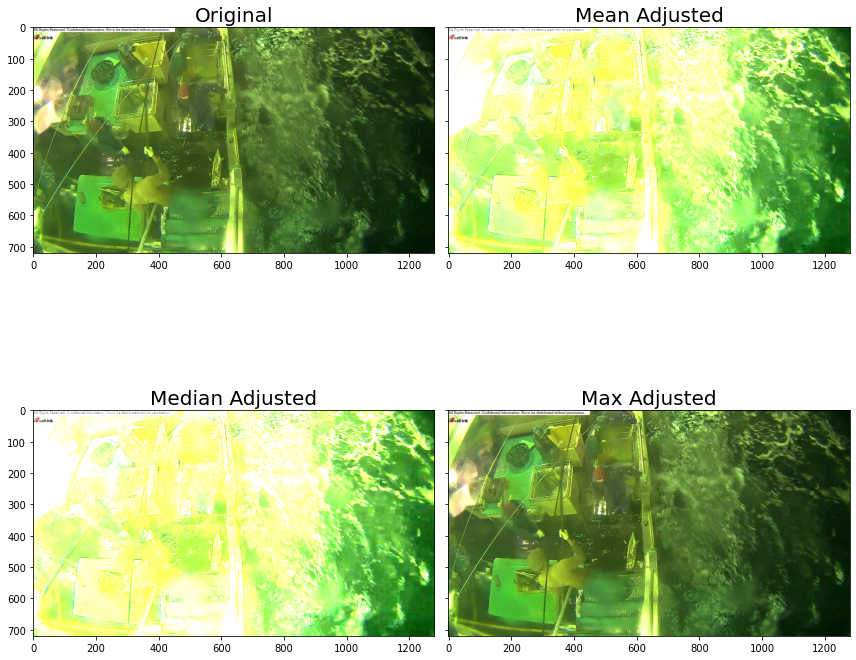

In [26]:
def mean_and_median_adjusted(image):
    fig, ax = plt.subplots(2, 2, figsize=(12,12), sharey = True)
    f_size = 20
    ax[0][0].imshow(image_overcast )
    ax[0][0].set_title('Original', fontsize = f_size)
    ax[0][1].imshow(img_as_ubyte((image / np.mean(image)).clip(0, 
                                  1)))
    ax[0][1].set_title('Mean Adjusted', fontsize = f_size)
    
    ax[1][0].imshow(img_as_ubyte((image/ np.median(image)).clip(0, 
                                  1)))
    ax[1][0].set_title('Median Adjusted', fontsize = f_size)    
    ax[1][1].imshow(img_as_ubyte((image/ np.max(image)).clip(0, 1)))
    ax[1][1].set_title('Max Adjusted', fontsize = f_size);
    
    fig.tight_layout()

mean_and_median_adjusted(image_overcast)

NameError: name 'image_overcast' is not defined

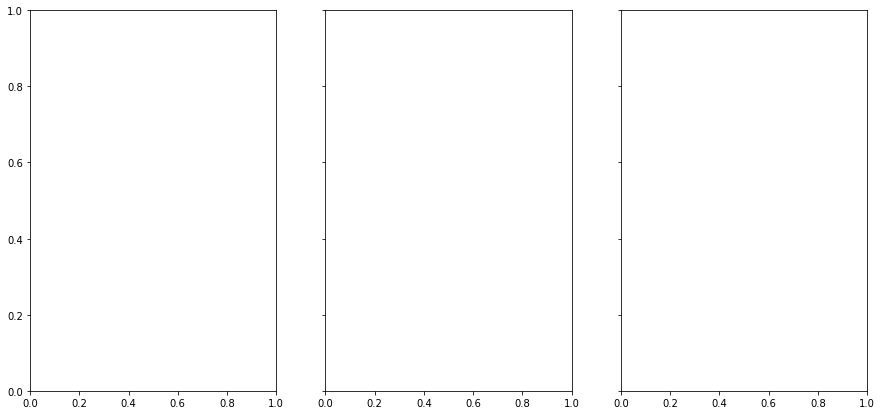

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True)
f_size = 15
ax[0].imshow(image_overcast)
ax[0].set_title('Original', fontsize = f_size)
ax[1].imshow(img_as_ubyte((image_overcast / 
                           [np.max(image_overcast[:,:,0]),
                            np.mean(image_overcast[:,:,1]),
                            np.mean(image_overcast[:,:,2])])
                            #np.mean(image_overcast[:,:,3])])
                            .clip(0, 1)))
ax[1].set_title('Red : Max, Others : Mean', fontsize = f_size)
ax[2].imshow(img_as_ubyte((image_overcast / 
                           [np.max(image_overcast[:,:,0]),
                            np.median(image_overcast[:,:,1]),
                            np.median(image_overcast[:,:,2])])                                    
                            #np.median(image_overcast[:,:,3])])
                            .clip(0, 1)))
ax[2].set_title('Red : Max, Others : Median', fontsize = f_size);

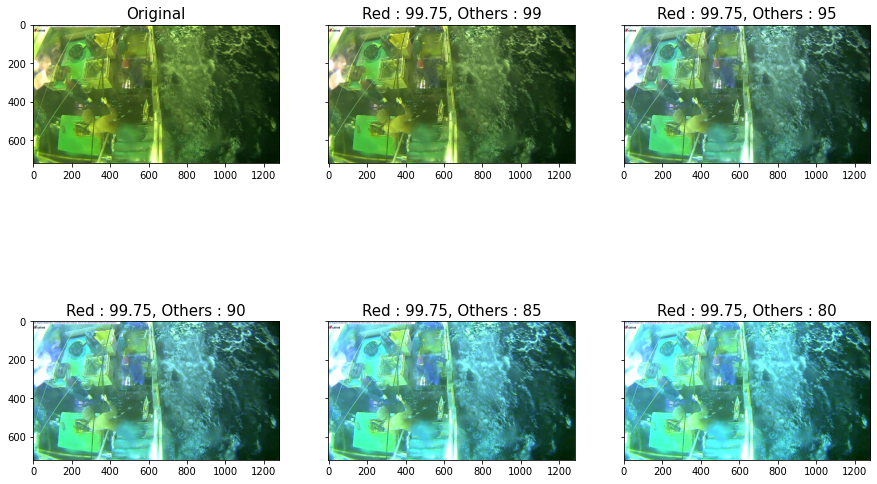

In [36]:
def percentile_adjustment(image):
   fig, ax = plt.subplots(2, 3, figsize=(15,10), sharey = True)
   f_size = 15
   red = 99.75  
   parameter_matrix = [[red] + [99]*3,
                        [red] + [95]*3,
                        [red] + [90]*3,
                        [red] + [85]*3,
                        [red] + [80]*3]
    
   ax[0][0].imshow(image)
   ax[0][0].set_title('Original', fontsize = f_size)    
   ax[0][1].imshow(img_as_ubyte((image / 
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[0][i], axis=(0, 1)) \
                    for i in range(0, 3)]).clip(0,1)))
   
   ax[0][1].set_title(f'Red : {red}, Others : {parameter_matrix[0][1]}', fontsize = f_size)    
   ax[0][2].imshow(img_as_ubyte((image / 
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[1][i], axis=(0, 1)) \
                    for i in range(0, 3)]).clip(0,1)))
    
   ax[0][2].set_title(f'Red : {red}, Others : {parameter_matrix[1][1]}', fontsize = f_size);    
   ax[1][0].imshow(img_as_ubyte((image / 
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[2][i], axis=(0, 1)) \
                    for i in range(0, 3)]).clip(0,1)))    
   ax[1][0].set_title(f'Red : {red}, Others : {parameter_matrix[2][1]}', fontsize = f_size);    
   ax[1][1].imshow(img_as_ubyte((image /
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[3][i], axis=(0, 1)) \
                    for i in range(0, 3)]).clip(0,1)))    
   ax[1][1].set_title(f'Red : {red}, Others : {parameter_matrix[3][1]}', fontsize = f_size);    
   ax[1][2].imshow(img_as_ubyte((image/ 
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[4][i], axis=(0, 1)) \
                    for i in range(0, 3)]).clip(0,1)))
    
   ax[1][2].set_title(f'Red : {red}, Others : {parameter_matrix[4][1]}', fontsize = f_size);
    
percentile_adjustment(image_overcast)

In [81]:
from PIL import Image
import colorcorrect.algorithm as cca
from colorcorrect.util import from_pil, to_pil
#img = Image.open('D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB\\img_00043.jpg')
#to_pil(cca.automatic_color_equalization(from_pil(img))).show()
i=0
img = Image.open('D:\\the-nature-conservancy-fisheries-monitoring\\train\\ALB\\img_00043.jpg')
to_pil(cca.automatic_color_equalization(from_pil(img))).save('D:\\the-nature-conservancy-fisheries-monitoring2\\train\\ALB\\img_'+ i.__str__()+'.jpg')

In [15]:
def image_adjustment(image):
    red = 99  
    parameter_matrix = [[red] + [99]*3,
                        [red] + [96]*3,
                        [red] + [90]*3,
                        [red] + [85]*3,
                        [red] + [80]*3]
       
    return img_as_ubyte((image / 
                    [np.percentile(image[:,:,i], 
                    parameter_matrix[1][i]) \
                    for i in range(0, 3)]).clip(0,1))
imshow(image_adjustment(image_overcast))

NameError: name 'image_overcast' is not defined

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    validation_split=0.2
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
#datagen_valid = ImageDataGenerator(samplewise_center=True)

In [6]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "D:\\the-nature-conservancy-fisheries-monitoring\\train2",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='training'
)

# load and iterate validation dataset
valid_it = datagen_train.flow_from_directory(
    "D:\\the-nature-conservancy-fisheries-monitoring\\train2",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=64,
    subset='validation'
)

Found 3025 images belonging to 8 classes.
Found 752 images belonging to 8 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
num_classes=8
model = Sequential()
model.add(Conv2D(125, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 125)     3500      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 125)    500       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 125)    0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 100)     112600    
                                                                 
 dropout_3 (Dropout)         (None, 112, 112, 100)     0         
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 100)   

In [9]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(
    train_it, 
    steps_per_epoch=train_it.samples/train_it.batch_size, 
    validation_data=valid_it, 
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=10)

Epoch 1/10
47/47 [==============================] - 69s 1s/step - loss: 3.0037 - accuracy: 0.4803 - val_loss: 5.4931 - val_accuracy: 0.1423
Epoch 2/10
47/47 [==============================] - 51s 1s/step - loss: 1.2364 - accuracy: 0.5967 - val_loss: 8.0706 - val_accuracy: 0.2088
Epoch 3/10
47/47 [==============================] - 50s 1s/step - loss: 1.0613 - accuracy: 0.6559 - val_loss: 2.2837 - val_accuracy: 0.4495
Epoch 4/10
47/47 [==============================] - 50s 1s/step - loss: 0.9189 - accuracy: 0.6979 - val_loss: 4.3680 - val_accuracy: 0.3378
Epoch 5/10
47/47 [==============================] - 51s 1s/step - loss: 0.8082 - accuracy: 0.7392 - val_loss: 3.8138 - val_accuracy: 0.4082
Epoch 6/10
47/47 [==============================] - 50s 1s/step - loss: 0.7197 - accuracy: 0.7597 - val_loss: 1.5342 - val_accuracy: 0.5957
Epoch 7/10
47/47 [==============================] - 50s 1s/step - loss: 0.7082 - accuracy: 0.7656 - val_loss: 1.4142 - val_accuracy: 0.6370
Epoch 8/10
47/47 [==

In [11]:
model.save('fish_model3')

INFO:tensorflow:Assets written to: fish_model3\assets


In [ ]:
from tensorflow import keras

model = keras.models.load_model('fish_model')

In [8]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[4.8620570e-03, 9.8836672e-08, 1.5448459e-05, 1.1408496e-18,
        1.6272134e-05, 8.3599239e-11, 5.5370628e-14, 9.9510610e-01]],
      dtype=float32)

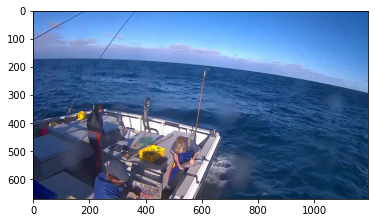

In [15]:
make_predictions('D:\\the-nature-conservancy-fisheries-monitoring\\train/ALB/img_00032.jpg')

In [12]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="greyscale", target_size=(225,225))
    return image

In [13]:
image = load_and_scale_image('/Users/mateuszfabisiewicz/Documents/the-nature-conservancy-fisheries-monitoring/train/SHARK/img_00247.jpg')
plt.imshow(image, cmap='grey')

ValueError: color_mode must be "grayscale", "rgb", or "rgba"